# Transparência COVID-19 Poços de Caldas

In [2]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format # formatação com duas casas decimais

## Importação dos dados

In [3]:
df = pd.read_csv("covid19_pocosdecaldas.csv")
df.replace(np.nan, 'x', inplace = True)
df.head()

,id,data,testes_realizados,casos_confirmados,novos_confirmados,descartados_total,casos_descartados_exame,casos_descartados_criterio_clinico,obitos_confirmados,obitos_nao_residentes,...,confirmados_ala,confirmados_uti,suspeitos_isolamento,suspeitos_ala,suspeitos_uti,obitos_investigacao,uti_covid,uti_covid_oc_conf,uti_covid_oc_susp,eventos
0,1,17/03/2020,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,x
1,2,18/03/2020,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,x
2,3,19/03/2020,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,x
3,4,20/03/2020,0,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,x
4,5,21/03/2020,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,x


## Série histórica

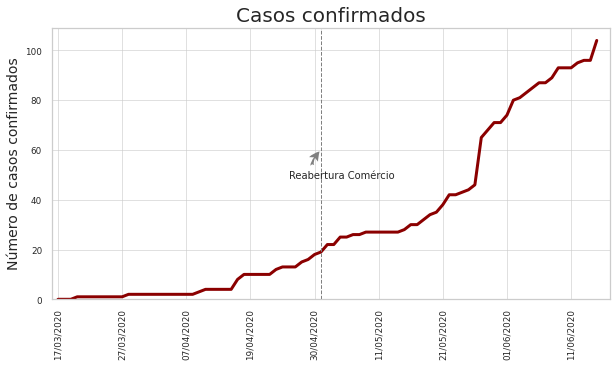

In [83]:
import numpy as np
import matplotlib.ticker as plticker
import math
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator

#sns.set_style("darkgrid")
sns.set_style("whitegrid")
#sns.set_context("paper")
#sns.set_context("talk")
#sns.set_context("poster")
sns.set_context("notebook", font_scale = .8, rc={"grid.linewidth": 0.6})
#sns.set_palette("husl",3)

flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui)

df_confirmados = df.copy()

fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%Y'))

#fig = plt.figure()

plt.xticks(df_confirmados.index, df_confirmados["data"].values, rotation=90)

x = df_confirmados.reset_index()['index']
y = df_confirmados['casos_confirmados']

#ax.scatter(x, y, color='darkred')

#ax.plot(y, color='darkred', linewidth=3)

sns.lineplot(x=x, y=y, data=df_confirmados, linewidth=3, color='darkred')

#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--", color="k", linewidth=1)

#data_inicial = '2020-05-17'
filtro = (df_confirmados['id'] >= 29)

df_filtrado = df_confirmados.loc[filtro]

#print(df_filtrado)

x2 = df_filtrado.reset_index()['index']
y2 = df_filtrado['casos_confirmados']

#z2 = np.polyfit(x2, y2, 1)
#p = np.poly1d(z2)
#plt.plot(x2,p(x2),"r--", color="red", linewidth=1)

#x3 = df_confirmados.reset_index()['index']
#y3 = df_confirmados['ativos']

#ax.scatter(x3, y3, color='blue')

#plt.suptitle('Casos confirmados', fontsize=18)
plt.title('Casos confirmados', fontsize=20)
#plt.xlabel('Data')
plt.ylabel('Número de casos confirmados', fontsize=14)
plt.xlabel('')
#ax.set(xlabel='common xlabel', ylabel='common ylabel')


#for label in ax.get_xticklabels()[::8]:
#    label.set_visible(True)

ax.set_ylim(bottom=0.)

ax.set_xlim(left=0., right=max(x))

#sns.despine() # remove bordas


#plt.gcf().autofmt_xdate()

# control x and y limits
plt.ylim(0, None)
plt.xlim(-1, max(x)+2)


labels = list(df_confirmados['data'])


def format_fn(tick_val, tick_pos):
    if int(tick_val) in x:
        return labels[int(tick_val)]
    else:
        return ''


ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for i, txt in enumerate(df_confirmados['eventos']):
    #ax.annotate(txt, (x[i]+0.3,y[i]-0.5), size=15)
    if (txt != 'x'):
        desloc = int(i/2)
        plt.annotate(txt, xy=(x[i], 40+desloc), xytext=(x[i]-5, 30+desloc), arrowprops=dict(arrowstyle="fancy, head_width=1, head_length=1",
                                                                                                fc="0.5", ec="none",
                                                                                                connectionstyle="angle3,angleA=0,angleB=45"), fontsize=10, va='center')
df_confirmados.replace('x', np.nan, inplace = True)
        
evento2 = df_confirmados[df_confirmados['eventos'].notnull()].index
xposition = evento2

for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--', linewidth=1)
    
plt.savefig("confirmados.png", transparent=True)